In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
import statsmodels.stats.api as sms
from statsmodels.compat import lzip
from arch import arch_model
from statsmodels.stats.diagnostic import het_arch

abspath = '/Users/alexcappadona/Downloads/'
data = pd.read_excel(abspath + 'SPXdaily.xlsx', index_col=0)
data.head()

,Open,High,Low,Close,Volume
Date,,,,,
2000-01-03,1469.25,1478.00,1438.36,1455.17,1148860
2000-01-04,1455.22,1455.22,1397.43,1399.42,1212540
2000-01-05,1399.42,1413.27,1377.68,1402.11,1417700
2000-01-06,1402.11,1411.90,1392.02,1403.45,1316610
2000-01-07,1403.45,1441.47,1400.73,1441.47,1467850


In [3]:
data.tail()

,Open,High,Low,Close,Volume
Date,,,,,
2021-11-22,4717.33,4743.83,4682.24,4682.94,2401188
2021-11-23,4678.30,4699.39,4652.66,4690.70,2182209
2021-11-24,4670.01,4702.87,4659.89,4701.46,1819169
2021-11-26,4643.06,4645.94,4585.43,4594.62,2120997
2021-11-29,4645.84,4672.95,4625.26,4655.27,2457202


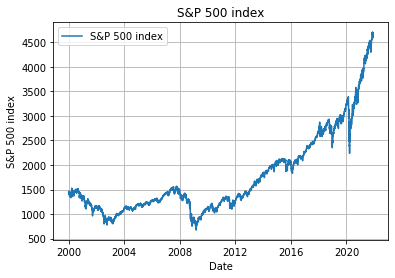

In [4]:
plt.figure(1)
plt.plot(data['Close'], label='S&P 500 index')
plt.xlabel('Date')
plt.ylabel('S&P 500 index')
plt.title('S&P 500 index')
plt.grid(True)
plt.legend()
plt.show()

In [5]:
data['LogClose']=np.log(data['Close']) # compute log of price 
data['ret']=100*data['LogClose'].diff() # diff() computes the daily change in log price
data=data.dropna()
data.head()

,Open,High,Low,Close,Volume,LogClose,ret
Date,,,,,,,
2000-01-04,1455.22,1455.22,1397.43,1399.42,1212540,7.243813,-3.906487
2000-01-05,1399.42,1413.27,1377.68,1402.11,1417700,7.245734,0.192038
2000-01-06,1402.11,1411.90,1392.02,1403.45,1316610,7.246689,0.095525
2000-01-07,1403.45,1441.47,1400.73,1441.47,1467850,7.273419,2.672994
2000-01-10,1441.47,1464.36,1441.47,1457.60,1244300,7.284547,1.112782


In [6]:
# if variance changes over time in a predictable way, we need a GARCH/ARCH model

In [7]:
formula = 'ret ~ 1'
results = smf.ols(formula, data).fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                    ret   R-squared:                      -0.000
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                       nan
Date:                Tue, 07 Dec 2021   Prob (F-statistic):                nan
Time:                        19:37:06   Log-Likelihood:                -9007.9
No. Observations:                5512   AIC:                         1.802e+04
Df Residuals:                    5511   BIC:                         1.802e+04
Df Model:                           0                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0211      0.017      1.263      0.2

In [8]:
# ARCH test
res = het_arch(results.resid,nlags=10) # resid is the variable we are analyzing
name = ['lm','lmpval','fval','fpval'] 
lzip(name,res)

[('lm', 1624.618349702691),
 ('lmpval', 0.0),
 ('fval', 230.07225397926584),
 ('fpval', 0.0)]

No handles with labels found to put in legend.


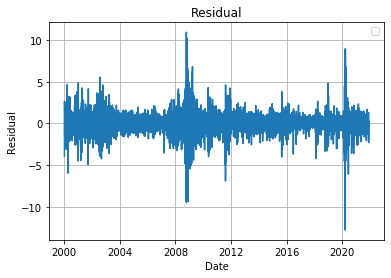

In [9]:
plt.figure(1)
plt.plot(results.resid) #data set, name of variable
plt.xlabel('Date')
plt.ylabel('Residual')
plt.title('Residual')
plt.grid(True)
plt.legend()
plt.show()

In [10]:
# for the project: 
# trying to generate a forecast for tomorrow's volatility 

Iteration:      1,   Func. Count:      6,   Neg. LLF: 7583.543041918723
Iteration:      2,   Func. Count:     16,   Neg. LLF: 7578.078844014088
Iteration:      3,   Func. Count:     24,   Neg. LLF: 7565.063890424915
Iteration:      4,   Func. Count:     32,   Neg. LLF: 7559.185668504735
Iteration:      5,   Func. Count:     39,   Neg. LLF: 7555.932350694919
Iteration:      6,   Func. Count:     46,   Neg. LLF: 7554.463720469106
Iteration:      7,   Func. Count:     53,   Neg. LLF: 7553.215528340851
Iteration:      8,   Func. Count:     60,   Neg. LLF: 7552.440730945412
Iteration:      9,   Func. Count:     66,   Neg. LLF: 7552.160265301816
Iteration:     10,   Func. Count:     72,   Neg. LLF: 7551.830479584547
Iteration:     11,   Func. Count:     78,   Neg. LLF: 7551.827120572438
Iteration:     12,   Func. Count:     84,   Neg. LLF: 7551.827100595176
Optimization terminated successfully.    (Exit mode 0)
            Current function value: 7551.827100592509
            Iterations: 12


/opt/anaconda3/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
/opt/anaconda3/lib/python3.7/site-packages/matplotlib/axes/_base.py:278: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


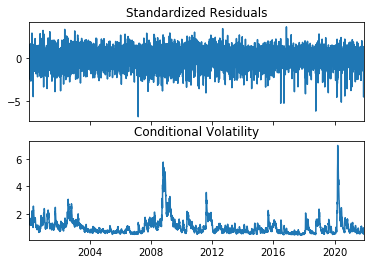

In [11]:
# Use GARCH model

model = arch_model(data['ret'], mean='constant', vol='GARCH', p=1, q=1)
model_fit = model.fit()
# Plot the results
model_fit.plot()
plt.show()

In [12]:
print(model_fit)

                     Constant Mean - GARCH Model Results                      
Dep. Variable:                    ret   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:               -7551.83
Distribution:                  Normal   AIC:                           15111.7
Method:            Maximum Likelihood   BIC:                           15138.1
                                        No. Observations:                 5512
Date:                Tue, Dec 07 2021   Df Residuals:                     5511
Time:                        19:37:10   Df Model:                            1
                                 Mean Model                                 
                 coef    std err          t      P>|t|      95.0% Conf. Int.
----------------------------------------------------------------------------
mu             0.0608  1.084e-02      5.610  2.020e-08 [3.

In [13]:
# want to make 1-period forecast for Nov 30
cv_forecast = model_fit.forecast(horizon=1) # forecast for Nov 30, 2021
print(cv_forecast.variance[-1:]**0.5) # print the forecast sigma

                 h.1
Date                
2021-11-29  1.021567


/opt/anaconda3/lib/python3.7/site-packages/arch/__future__/_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,


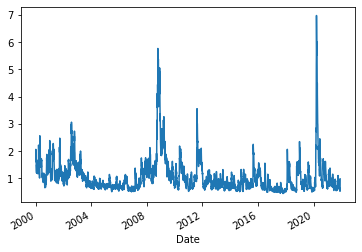

In [14]:
resid = model_fit.resid
cond_std = model_fit.conditional_volatility
cond_std.plot()
plt.show()

In [15]:
# f. perform an arch test on the standardized residuals

st_residuals = pd.merge(resid, cond_std, how="inner", on="Date")
st_residuals.head()

,resid,cond_vol
Date,,
2000-01-04,-3.967310,1.620494
2000-01-05,0.131215,2.062179
2000-01-06,0.034701,1.915721
2000-01-07,2.612170,1.780111
2000-01-10,1.051959,1.896553


In [16]:
st_residuals = st_residuals.resid/st_residuals.cond_vol

In [17]:
st_residuals.describe()

count    5512.000000
mean       -0.048310
std         0.999225
min        -6.753283
25%        -0.581435
50%         0.003505
75%         0.557465
max         3.552174
dtype: float64

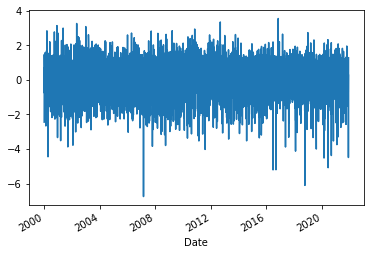

In [18]:
st_residuals.plot()
plt.show()

In [19]:
# ARCH test on standardized residuals
res = het_arch(st_residuals,nlags=10)
name = ['lm','lmpval','fval','fpval'] 
lzip(name,res)

[('lm', 14.768893829523142),
 ('lmpval', 0.1407174882640008),
 ('fval', 1.4779037815031764),
 ('fpval', 0.14067757656913857)]

In [20]:
np.quantile(st_residuals, 0.01)

-2.8159663521890224

In [21]:
np.quantile(st_residuals, 0.99)

2.194025605327687

In [22]:
# save to csv
cond_std.to_csv('/Users/alexcappadona/Downloads/ConStdSP500.csv')